# Hierarchical clustering with 2D toy datasets

# [作業目標]
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])# [作業重點]
- 以幾種 2D 樣板資料, 觀察階層式聚類在 "linkage參數" 有所不同時, 分群的效果如何變化 (In[4], Out[4])

In [8]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import seaborn as sns
%matplotlib inline

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

# 生成 雙半月 資料點
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# 生成 緊密三群 資料點
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# 生成 2維均勻分布 資料點
no_structure = np.random.rand(n_samples, 2), None

In [27]:
# 設定群集與繪圖參數
plt.figure(figsize=(10, 8))
#plot_num = 1
#default_base = {'n_neighbors': 10, 'n_clusters': 3}
#datasets = [(noisy_moons, {'n_clusters': 2}), (blobs, {}), (no_structure, {})]
datasets = [(noisy_moons, 2), (blobs, 3), (no_structure, 3)]

<Figure size 720x576 with 0 Axes>

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

In [49]:
from sklearn.cluster import AgglomerativeClustering
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=2, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=2, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=2, linkage="average")),
              ('single', AgglomerativeClustering(n_clusters=2, linkage="single"))]

In [51]:
estimators = [('hc_ward', "ward"),
              ('hc_complete', "complete"),
              ('hc_average', "average"),
              ('single', "single")]

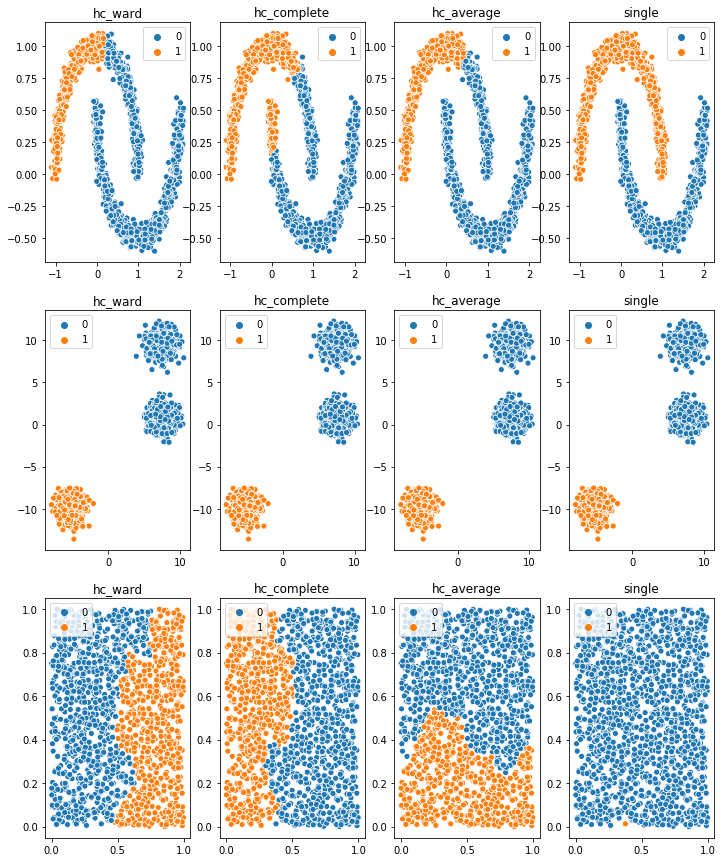

In [50]:
# 執行各種樣板資料的繪圖迴圈
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,15))
i,j = (0,0)
for data, cluster in datasets:
    j=0
    for name, est in estimators:
        cluster =AgglomerativeClustering(n_clusters=2, linkage=est)
        est.fit(data[0])
        sns.scatterplot(data[0][:,0],data[0][:,1],hue=est.labels_,ax=axes[i][j])
        axes[i][j].set_title(name)
        j+=1
    i+=1
plt.show()        
#sns.scatterplot(no_structure[0][:,0], no_structure[0][:,1])